In [3]:
## Combining Datasets ##
#importing libraries
import pandas as pd
import numpy as np

#loading in all data
covid = pd.read_excel("coviddata.xlsx")
poverty = pd.read_excel("povertydata.xlsx")
house = pd.read_excel("multigenerationalhouseholddata.xlsx")

#merging datasets to one file and removing empty numbers
data = covid.merge(poverty,on="Geography")
data = data.merge(house,on="Geography")

newdata = data.dropna()

#write to a new csv file
newdata.to_csv('data.csv')

Text(0.5, 1.0, 'County-Level Data of Multigenerational Households vs Households Below Poverty Level')

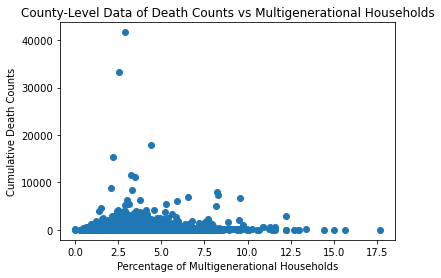

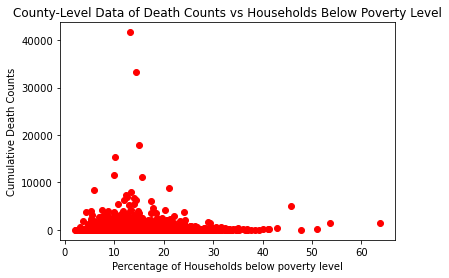

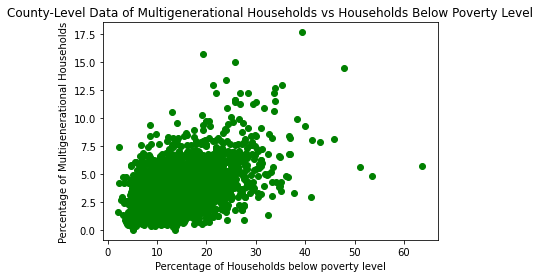

In [4]:
## Visualizing Raw Data ##
#importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#importing data
data = pd.read_csv("data.csv")

data["% Multigenerational"] = (data["Household has three or more generations"]/data["Total Households"])*100

#print(data)

#plotting cumulative deaths vs % of multigenerational homes
plt.figure()
plt.plot(data["% Multigenerational"],data["deaths"],'o')
plt.xlabel("Percentage of Multigenerational Households")
plt.ylabel("Cumulative Death Counts")
plt.title("County-Level Data of Death Counts vs Multigenerational Households")

#plotting cumulative deaths vs % of households below poverty level
plt.figure()
plt.plot(data["Estimated % of Households Below poverty level"],data["deaths"],'ro')
plt.xlabel("Percentage of Households below poverty level")
plt.ylabel("Cumulative Death Counts")
plt.title("County-Level Data of Death Counts vs Households Below Poverty Level")

#plotting % of households below poverty level vs % of multigenerational homes
plt.figure()
plt.plot(data["Estimated % of Households Below poverty level"],data["% Multigenerational"],'go')
plt.xlabel("Percentage of Households below poverty level")
plt.ylabel("Percentage of Multigenerational Households")
plt.title("County-Level Data of Multigenerational Households vs Households Below Poverty Level")

In [6]:
## T test comparisons ##
from scipy import stats
house = data["% Multigenerational"]
covid = data["deaths"]
poverty = data["Estimated % of Households Below poverty level"]
# Cumulative deaths vs Multigenerational households
t_val, p_val = stats.ttest_ind(covid,house)

#cumulative deaths vs poverty levels
t_val2, p_val2 = stats.ttest_ind(covid,poverty)

#households vs poverty
t_val3, p_val3 = stats.ttest_ind(house,poverty)

print(p_val,p_val2,p_val3)

2.488846931218156e-47 2.347308823705616e-44 0.0


In [32]:
## interaction comparison ##
import statsmodels.api as sm
from numpy.linalg import inv
X = np.c_[house,poverty,house*poverty]
X = sm.add_constant(X)

tmp = inv(np.matmul(np.transpose(X),X))

intercept, houseslope, povertyslope, housepoverty= tmp @ np.transpose(X) @ covid

model = sm.OLS(covid,X).fit()
print(model.summary())

y = intercept+covid*houseslope+covid*povertyslope+covid*housepoverty


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.035
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00710
Time:                        10:00:34   Log-Likelihood:                -26748.
No. Observations:                3129   AIC:                         5.350e+04
Df Residuals:                    3125   BIC:                         5.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.4107    114.657      1.198      0.2